In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import tukey_hsd
import scikit_posthocs as sp

In [16]:
#Import Sales Fact table and Sales People Dimensions Table

df = pd.read_csv(r'C:/Users/uist1/OneDrive/Desktop/Power Bi Dashboards/Car Sales Dashboard/car_sales_data_reduced.csv')
df_salespeople = pd.read_csv(r'C:/Users/uist1/OneDrive/Desktop/Power Bi Dashboards/Car Sales Dashboard/Salespeople Directory.csv')
df_manufacture_details = (pd.read_excel(r'C:/Users/uist1/OneDrive/Desktop/Power Bi Dashboards/Car Sales Dashboard/Car Manufacturer Directory.xlsx',
                                        sheet_name = 'Sheet2'))

## Data Prep

In [18]:
#Examine Fact Table Structure
df.head(5)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,01/08/2022,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,15/03/2023,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,29/04/2023,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,04/09/2022,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,16/06/2022,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [19]:
#Add index for each Sale
df = df.reset_index(drop = True)

In [20]:
#Convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
#Add Year Column for Sale
df['Sale Year'] = df['Date'].dt.year
#Add Month Column for Sale
df['Sale Month'] = df['Date'].dt.month

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               100000 non-null  datetime64[ns]
 1   Salesperson        100000 non-null  object        
 2   Customer Name      100000 non-null  object        
 3   Car Make           100000 non-null  object        
 4   Car Model          100000 non-null  object        
 5   Car Year           100000 non-null  int64         
 6   Sale Price         100000 non-null  int64         
 7   Commission Rate    100000 non-null  float64       
 8   Commission Earned  100000 non-null  float64       
 9   Sale Year          100000 non-null  int32         
 10  Sale Month         100000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 7.6+ MB


In [22]:
##Join Salesdata with Salesperson information
Joined_Dataset = pd.merge(df, df_salespeople, on = 'Salesperson', how = 'left')

In [23]:
Joined_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date                                  100000 non-null  datetime64[ns]
 1   Salesperson                           100000 non-null  object        
 2   Customer Name                         100000 non-null  object        
 3   Car Make                              100000 non-null  object        
 4   Car Model                             100000 non-null  object        
 5   Car Year                              100000 non-null  int64         
 6   Sale Price                            100000 non-null  int64         
 7   Commission Rate                       100000 non-null  float64       
 8   Commission Earned                     100000 non-null  float64       
 9   Sale Year                             100000 non-null  int32

In [24]:
##Create required matcher to join Sales to Manufacture details and for Joined Dataset 
#Manufacturer
df_manufacture_details['Matcher'] = df_manufacture_details['Model'].astype(str) + " " + df_manufacture_details['Model Year'].astype(str)
#Sales
Joined_Dataset['Matcher'] = Joined_Dataset['Car Model'].astype(str) + " " + Joined_Dataset['Car Year'].astype(str)

In [25]:
##Join Sales to Manufacture 
Joined_Dataset = pd.merge(Joined_Dataset, df_manufacture_details, on = 'Matcher', how = 'left').reset_index(drop = True)

In [26]:
Joined_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date                                  100000 non-null  datetime64[ns]
 1   Salesperson                           100000 non-null  object        
 2   Customer Name                         100000 non-null  object        
 3   Car Make                              100000 non-null  object        
 4   Car Model                             100000 non-null  object        
 5   Car Year                              100000 non-null  int64         
 6   Sale Price                            100000 non-null  int64         
 7   Commission Rate                       100000 non-null  float64       
 8   Commission Earned                     100000 non-null  float64       
 9   Sale Year                             100000 non-null  int32

In [27]:
##Drop Uneeded Columns
Joined_Dataset.drop(Joined_Dataset.columns[16: 18], axis = 1, inplace = True)

In [28]:
Joined_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date                                  100000 non-null  datetime64[ns]
 1   Salesperson                           100000 non-null  object        
 2   Customer Name                         100000 non-null  object        
 3   Car Make                              100000 non-null  object        
 4   Car Model                             100000 non-null  object        
 5   Car Year                              100000 non-null  int64         
 6   Sale Price                            100000 non-null  int64         
 7   Commission Rate                       100000 non-null  float64       
 8   Commission Earned                     100000 non-null  float64       
 9   Sale Year                             100000 non-null  int32

In [29]:
#Check for nulls
Joined_Dataset.isnull().sum()

Date                                    0
Salesperson                             0
Customer Name                           0
Car Make                                0
Car Model                               0
Car Year                                0
Sale Price                              0
Commission Rate                         0
Commission Earned                       0
Sale Year                               0
Sale Month                              0
Salesperson_ID                          0
Salary                                  0
Annual Bonus                            0
Salary Percentage Required for Bonus    0
State                                   0
Model                                   0
Model Year                              0
Current Value                           0
dtype: int64

In [30]:
#Apply Lambda function to assign sale performance (sale price against car value)
Joined_Dataset['Sale Performance'] = (Joined_Dataset.apply(lambda row: 'Above Asking Price' if row['Sale Price'] > row['Current Value'] 
                                                           else "Asking Price" if row['Sale Price'] == row['Current Value'] else
                                                           "Below Asking Price", axis = 1))

In [31]:
#Add Sale Index for Aggrigation 
Joined_Dataset.reset_index(drop = True, inplace = True)
Joined_Dataset.index = Joined_Dataset.index + 1
Joined_Dataset.reset_index(drop = False, inplace = True)

In [32]:
##Create Pivot to see model performance
Performance_Pivot = Joined_Dataset.pivot_table(values = 'index', index = 'Car Model', columns = 'Sale Performance', aggfunc = 'count')

In [33]:
##Display Percentage of sales above asking price
Performance_Pivot['Percentage_>_asking_Price'] = (Performance_Pivot['Above Asking Price'] / 
                                                  (Performance_Pivot['Above Asking Price'] + Performance_Pivot['Below Asking Price']).round(2))


In [34]:
##Best Performing Model is Corolla with around 90% of Sales being above asking Price, F-150 is the worst performing model with around 
##45% selling for less than asking price
Performance_Pivot

Sale Performance,Above Asking Price,Asking Price,Below Asking Price,Percentage_>_asking_Price
Car Model,,,,
Altima,17256.0,1.0,2641.0,0.867266
Civic,16699.0,1.0,3226.0,0.838093
Corolla,18062.0,NaN,1936.0,0.903190
F-150,11034.0,NaN,9097.0,0.548110
Silverado,11964.0,1.0,8082.0,0.596827


## Investigation #1 - Sales performance for F-150 sales in the context of state sold in 

In [36]:
##Filter Df for F-150
F_150_Df = Joined_Dataset[(Joined_Dataset['Car Model'] == 'F-150') & (Joined_Dataset['Car Make'] == 'Chevrolet')]

In [37]:
##Drop uneeded columns 
F_150_Cols = F_150_Df.iloc[ : , [5, 16, 20]]

In [38]:
#Examine Distribution of Sales by States
F_150_Gb = F_150_Cols.groupby('State').count()

In [39]:
##Select the states with the highest number of sales to generate the widest sample
F_150_Gb = F_150_Gb.sort_values(by='Car Model', ascending = False).reset_index(drop = False)

In [40]:
#Create Top 5 list to filter main Df by
top5 = F_150_Gb.iloc[ : 5, [0]]
#Convert to list
top5 = top5['State'].to_list()
#Filter Main Dataframe to just F-150 sales from top 5 states
Top5_F150 = Joined_Dataset[(Joined_Dataset['State'].isin(top5)) & (Joined_Dataset['Car Model'] == 'F-150') & (Joined_Dataset['Car Make'] == 'Chevrolet')]

In [41]:
#Drop all columns except sales and state
Top5_F150 = Top5_F150.iloc[ : , [7, 16]]
#Group States to pass into Levene's test for Homoskedasisity
Grouped_states = Top5_F150.groupby(['State'])

In [42]:
#Prepare Data for shaprio test (test for normality)
Test_Data = Top5_F150['Sale Price']
#p < 0.05 so there is not signigicant evidence to say data is from a normally distributed dataset 
shapiro(Test_Data)

ShapiroResult(statistic=0.9489830880190584, pvalue=9.601073687539378e-12)

<Axes: xlabel='Sale Price', ylabel='Count'>

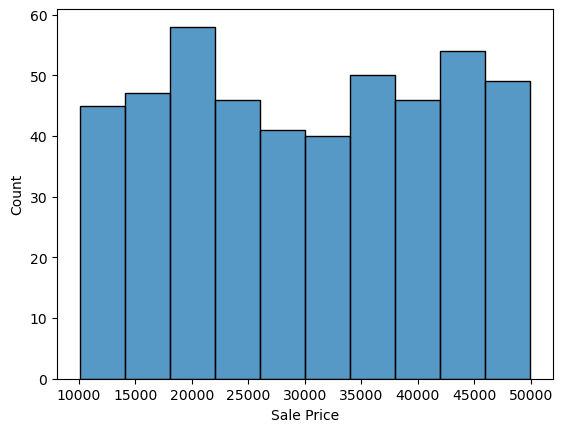

In [43]:
#Create a histogram to visualise this distribution 
sns.histplot(data=Top5_F150, x='Sale Price')
#Data is clearely not normally distrbuted

In [44]:
Top5_F150

,Sale Price,State
239,47493,Iowa
857,23308,Iowa
1279,41214,Nebraska
1343,15565,Georgia
1401,34633,Iowa
...,...,...
99548,16226,Wyoming
99551,16983,Nebraska
99719,38790,Nebraska
99823,49236,Nebraska


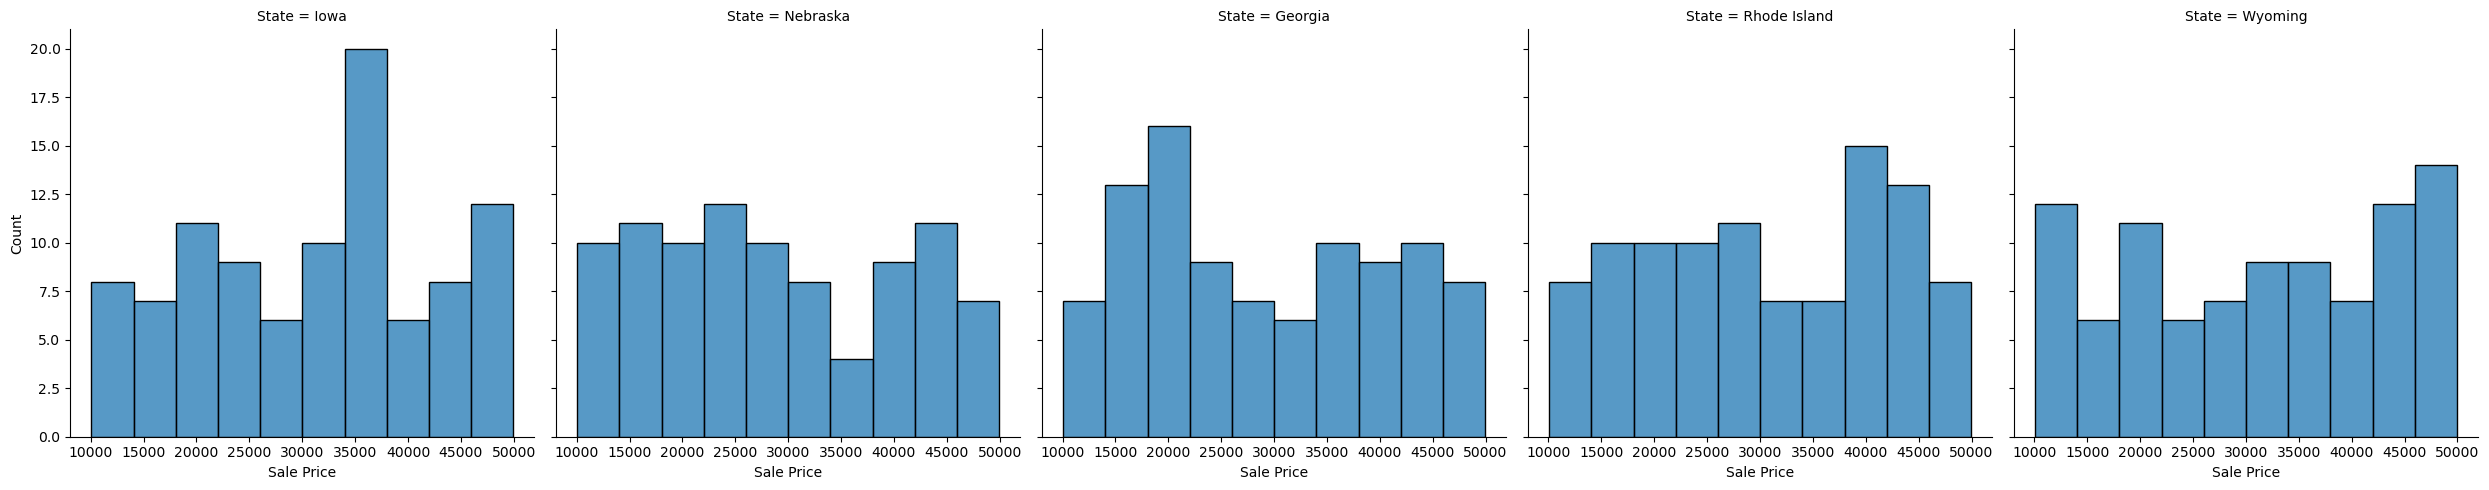

In [45]:
#Further investigation reveals that distrubtion is not normal across any states. We can therefore confirm that this data is not normally distrubted
sns.displot(
    Top5_F150, x='Sale Price', col = 'State',
)
#As the data has not been randomly sampled from the population we cannot apply the central limit theroem 

In [46]:
#Create Groups
Wyoming = Grouped_states.get_group(('Wyoming',)).iloc[ : , [0]]
Georgia = Grouped_states.get_group(('Georgia',)).iloc[ : , [0]]
Iowa = Grouped_states.get_group(('Iowa',)).iloc[ : , [0]]
Rhode_Island = Grouped_states.get_group(('Rhode Island',)).iloc[ : , [0]]
Nebraska = Grouped_states.get_group(('Nebraska',)).iloc[ : , [0]]

In [47]:
#Conduct levene Test to establish if variance in states is equal
stats.levene(Wyoming, Georgia, Iowa, Rhode_Island, Nebraska, center='median')
#p > then .05. Accept Null Hypothesis. Variance Between groups is equal

LeveneResult(statistic=array([0.41542422]), pvalue=array([0.79755582]))

In [48]:
#Conduct one way Anova examining top 5 states
F, p = f_oneway(Wyoming, Georgia, Iowa, Rhode_Island, Nebraska)
print(f"F-statistic: {F}, p-value: {p}")
#p < 0.05, Reject the null Hypothesis. The sale price of an F-150 vehicle is significantly different between states 

F-statistic: [0.95021859], p-value: [0.43465284]


Although Results of ANOVA indicate that there is a significant difference in the price an F-150 is sold for dependent upon the state it is sold in
due to the clear lack of normality (Homoskedasisiity) the data violates the normality assumption required for a parametric test such as an ANOVA
furthermore as the data was not a random sample of the population we cannot apply the central limit theroem which allows for this assumption to be bypassed therefore to procede we will look to use a non-parametric test

## Kruskal Wallis test

Standard non-parametric test for this scenario is the Kruskal Wallis test. The three key assumptions are met for this test
1: Data is not normally distributed
2: Output Variable is continuous 
3: The observations are independed of each other

In [52]:
Result = stats.kruskal(Wyoming, Georgia, Iowa, Rhode_Island, Nebraska)

print(Result)

KruskalResult(statistic=array([3.74424178]), pvalue=array([0.44172395]))


p< 0.05 therefore we can reject the null hypothesis that the mean sale price of the F-150 is equal across the 5 observed states
proceed with Post-Hoc Dunn test to examine mean sale price comparison between states, and where the significant difference are 

In [54]:
data = [Top5_F150[Top5_F150['State'] == 'Wyoming']['Sale Price'],
        Top5_F150[Top5_F150['State'] == 'Georgia']['Sale Price'],
        Top5_F150[Top5_F150['State'] == 'Iowa']['Sale Price'],
        Top5_F150[Top5_F150['State'] == 'Rhode Island']['Sale Price'],
        Top5_F150[Top5_F150['State'] == 'Nebraska']['Sale Price']]

p_values = sp.posthoc_dunn(data, p_adjust='holm').reset_index(drop = True)

p_values 
# Results of the Dunn Test reveal the two states where the mean sale price is stastistically signifcant is Hawaii and South Dakota 

,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
